In [3]:
!pip install numpy

In [4]:
!pip install pandas


In [5]:
!pip install matplotlib

In [6]:
import numpy as np

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

In [8]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [9]:
movies = pd.read_csv('/content/gdrive/MyDrive/movie reccomender system/data/tmdb_5000_movies.csv')

In [10]:
credits = pd.read_csv('/content/gdrive/MyDrive/movie reccomender system/data/tmdb_5000_credits.csv')

In [11]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500


In [12]:
credits.head(30)

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
5,559,Spider-Man 3,"[{""cast_id"": 30, ""character"": ""Peter Parker / ...","[{""credit_id"": ""52fe4252c3a36847f80151a5"", ""de..."
6,38757,Tangled,"[{""cast_id"": 34, ""character"": ""Flynn Rider (vo...","[{""credit_id"": ""52fe46db9251416c91062101"", ""de..."
7,99861,Avengers: Age of Ultron,"[{""cast_id"": 76, ""character"": ""Tony Stark / Ir...","[{""credit_id"": ""55d5f7d4c3a3683e7e0016eb"", ""de..."
8,767,Harry Potter and the Half-Blood Prince,"[{""cast_id"": 3, ""character"": ""Harry Potter"", ""...","[{""credit_id"": ""52fe4273c3a36847f801fab1"", ""de..."
9,209112,Batman v Superman: Dawn of Justice,"[{""cast_id"": 18, ""character"": ""Bruce Wayne / B...","[{""credit_id"": ""553bf23692514135c8002886"", ""de..."


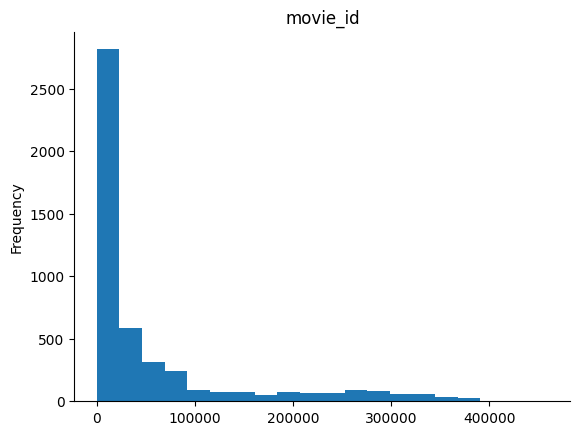

In [13]:
# @title movie_id

from matplotlib import pyplot as plt
credits['movie_id'].plot(kind='hist', bins=20, title='movie_id')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [14]:
movies = movies.merge(credits, on ="title")

In [15]:
movies.head(2)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,movie_id,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,19995,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,285,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."


In [16]:
movies.shape

(4809, 23)

In [17]:
movies.iloc[0]

budget                                                          237000000
genres                  [{"id": 28, "name": "Action"}, {"id": 12, "nam...
homepage                                      http://www.avatarmovie.com/
id                                                                  19995
keywords                [{"id": 1463, "name": "culture clash"}, {"id":...
original_language                                                      en
original_title                                                     Avatar
overview                In the 22nd century, a paraplegic Marine is di...
popularity                                                     150.437577
production_companies    [{"name": "Ingenious Film Partners", "id": 289...
production_countries    [{"iso_3166_1": "US", "name": "United States o...
release_date                                                   2009-12-10
revenue                                                        2787965087
runtime                               

In [18]:
movies['original_language'].value_counts()

original_language
en    4510
fr      70
es      32
zh      27
de      27
hi      19
ja      16
it      14
ko      12
cn      12
ru      11
pt       9
da       7
sv       5
nl       4
fa       4
th       3
he       3
ta       2
cs       2
ro       2
id       2
ar       2
vi       1
sl       1
ps       1
no       1
ky       1
hu       1
pl       1
af       1
nb       1
tr       1
is       1
xx       1
te       1
el       1
Name: count, dtype: int64

In [19]:
movies.columns

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')

In [20]:
movies = movies[['movie_id','original_title','keywords','overview','genres','cast','crew','original_language']]

In [21]:
movies.head()

,movie_id,original_title,keywords,overview,genres,cast,crew,original_language
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en
2,206647,Spectre,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de...",en
3,49026,The Dark Knight Rises,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de...",en
4,49529,John Carter,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de...",en


In [22]:
movies.shape

(4809, 8)

In [23]:
movies.dropna(inplace=True)

In [24]:
movies.shape

(4806, 8)

In [25]:
import ast

def convert(text):
  l = []
  for i in ast.literal_eval(text):
    l.append(i['name'])
  return l

In [26]:
movies['genres'] = movies['genres'].apply(convert)

In [27]:
movies.head(2)

,movie_id,original_title,keywords,overview,genres,cast,crew,original_language
0,19995,Avatar,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en


In [28]:
movies['keywords'] = movies['keywords'].apply(convert)

In [29]:
movies.head(2)

,movie_id,original_title,keywords,overview,genres,cast,crew,original_language
0,19995,Avatar,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en


In [30]:
movies['cast'] = movies['cast'].apply(convert)

In [31]:
movies.head(2)

,movie_id,original_title,keywords,overview,genres,cast,crew,original_language
0,19995,Avatar,"[culture clash, future, space war, space colon...","In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de...",en
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de...",en


In [43]:
import ast

def fetch_director(text):
  l = []
  for i in ast.literal_eval(text):
    if i['job'] == 'Director':
      l.append(i['name'])
      break
  return l

In [44]:
movies['crew']= movies['crew'].apply(fetch_director)

In [45]:
movies.head(2)

,movie_id,original_title,keywords,overview,genres,cast,crew,original_language,tags
0,19995,Avatar,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],en,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],en,"[Captain, Barbossa,, long, believed, to, be, d..."


In [51]:
movies.head(2)

,movie_id,original_title,keywords,overview,genres,cast,crew,original_language,tags
0,19995,Avatar,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],en,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],en,"[Captain, Barbossa,, long, believed, to, be, d..."


In [54]:
movies.iloc[0]['overview']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.']

In [55]:
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']

In [56]:
movies.head()

,movie_id,original_title,keywords,overview,genres,cast,crew,original_language,tags
0,19995,Avatar,"[culture clash, future, space war, space colon...","[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],en,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[ocean, drug abuse, exotic island, east india ...","[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],en,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[spy, based on novel, secret agent, sequel, mi...","[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],en,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[dc comics, crime fighter, terrorist, secret i...","[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],en,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[based on novel, mars, medallion, space travel...","[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],en,"[John, Carter, is, a, war-weary,, former, mili..."


In [57]:
movies.iloc[0]['tags']

['In',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'Marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'Pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'Action',
 'Adventure',
 'Fantasy',
 'Science Fiction',
 'culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'Sam Worthington',
 'Zoe Saldana',
 'Sigourney Weaver',
 'Stephen Lang',
 'Michelle Rodriguez',
 'Giovanni Ribisi',
 'Joel David Moore',
 'CCH Pounder',
 'Wes Studi',
 'Laz Alonso',
 'Dileep Rao',
 'Matt Gerald',
 'Sean Anthony Moran',
 'Jason Whyte',
 'Scott Lawrence',
 'Kelly Kilgour',
 'James Patrick Pitt',
 'Sean Patrick Murphy',
 'Peter Dillon',
 'Kevin Dorman',
 'Kel

In [58]:
new_df = movies[['movie_id','original_title','tags']]

In [59]:
new_df.head()

,movie_id,original_title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [60]:
new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))
new_df.head()

<ipython-input-60-255fe97a2c35>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: " ".join(x))


,movie_id,original_title,tags
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...
4,49529,John Carter,"John Carter is a war-weary, former military ca..."


In [69]:
new_df.iloc[0]['tags']

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi scienc fiction cultur clash futur space war space coloni societi space travel futurist romanc space alien tribe alien planet cgi marin soldier battl love affair anti war power relat mind and soul 3d sam worthington zoe saldana sigourney weaver stephen lang michel rodriguez giovanni ribisi joel david moor cch pounder we studi laz alonso dileep rao matt gerald sean anthoni moran jason whyte scott lawrenc kelli kilgour jame patrick pitt sean patrick murphi peter dillon kevin dorman kelson henderson david van horn jacob tomuri michael blain-rozgay jon curri luke hawker woodi schultz peter mensah sonia yee jahnel curfman ilram choi kyla warren lisa roumain debra wilson chri mala taylor kibbi jodi landau juli lamm cullen b. madden joseph bradi madden franki torr austin wilson sara wilson tamica washington-mil

In [70]:
import nltk
from nltk.stem import PorterStemmer


In [71]:
ps = PorterStemmer()

In [72]:
def stems(text):
    T = []
    for i in text.split():
        T.append(ps.stem(i))
    return " ".join(T)

In [73]:
new_df['tags'] = new_df['tags'].apply(stems)

<ipython-input-73-ebce1bd97223>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stems)


In [74]:
new_df.iloc[0]['tags']

'in the 22nd century, a parapleg marin is dispatch to the moon pandora on a uniqu mission, but becom torn between follow order and protect an alien civilization. action adventur fantasi scienc fiction cultur clash futur space war space coloni societi space travel futurist romanc space alien tribe alien planet cgi marin soldier battl love affair anti war power relat mind and soul 3d sam worthington zoe saldana sigourney weaver stephen lang michel rodriguez giovanni ribisi joel david moor cch pounder we studi laz alonso dileep rao matt gerald sean anthoni moran jason whyte scott lawrenc kelli kilgour jame patrick pitt sean patrick murphi peter dillon kevin dorman kelson henderson david van horn jacob tomuri michael blain-rozgay jon curri luke hawker woodi schultz peter mensah sonia yee jahnel curfman ilram choi kyla warren lisa roumain debra wilson chri mala taylor kibbi jodi landau juli lamm cullen b. madden joseph bradi madden franki torr austin wilson sara wilson tamica washington-mil

In [75]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [76]:
vector = cv.fit_transform(new_df['tags']).toarray()

In [77]:
vector.shape

(4806, 5000)

In [79]:
from sklearn.metrics.pairwise import cosine_similarity

In [80]:
similarity = cosine_similarity(vector)

In [81]:
similarity.shape

(4806, 4806)

In [94]:
new_df[new_df['original_title'] == 'The Godfather'].index[0]

3342

In [97]:
def recommend(movie):
    index = new_df[new_df['original_title'] == movie].index[0]
    distances = sorted(list(enumerate(similarity[index])),reverse=True,key = lambda x: x[1])
    for i in distances[1:6]:
        print(new_df.iloc[i[0]].title)